# LIB

In [1]:
import pandas as pd
import numpy as np
import warnings, random
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
import math
import seaborn as sns

from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from category_encoders.ordinal import OrdinalEncoder
from sklearn.model_selection import StratifiedKFold

from sklearn.cluster import KMeans
from catboost import CatBoostClassifier, Pool

from sklearn.model_selection import StratifiedKFold,train_test_split
import optuna
from optuna.samplers import TPESampler
from sklearn import datasets
import sklearn.datasets
import sklearn.metrics
from sklearn.model_selection import train_test_split
import xgboost as xgb
#import psutil
import gc
import time


from sklearn.ensemble import RandomForestClassifier

In [2]:
# !pip install catboost 
# !pip install category_encoders

# Load Data

In [3]:
train=pd.read_csv('train2.csv')
test=pd.read_csv('test2.csv')

In [4]:
train.head()

,Unnamed: 0,id,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,...,email,occyp_type,family_size,begin_month,credit,YEARS_BIRTH,Age_group,YEARS_EMPLOYED,EMPLOYED_group,income_avg
0,0,F138994709202500,F,N,N,0,202500.0,Commercial associate,Higher education,Married,...,0,NaN,2.0,6.0,1.0,39,30,12,10~20,101250.0
1,1,F113801540247500,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,...,1,Laborers,3.0,5.0,1.0,32,30,4,1~5,82500.0
2,2,M190874434450000,M,Y,Y,0,450000.0,Working,Higher education,Married,...,0,Managers,2.0,22.0,2.0,53,50,12,10~20,225000.0
3,3,F150882092202500,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,...,0,Sales staff,2.0,37.0,0.0,42,40,5,5~10,101250.0
4,4,F150372105157500,F,Y,Y,0,157500.0,State servant,Higher education,Married,...,0,Managers,2.0,26.0,2.0,42,40,5,5~10,78750.0


In [5]:
train.drop(['Unnamed: 0'],axis=1,inplace=True)
train.head()

,id,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,email,occyp_type,family_size,begin_month,credit,YEARS_BIRTH,Age_group,YEARS_EMPLOYED,EMPLOYED_group,income_avg
0,F138994709202500,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,...,0,NaN,2.0,6.0,1.0,39,30,12,10~20,101250.0
1,F113801540247500,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,1,Laborers,3.0,5.0,1.0,32,30,4,1~5,82500.0
2,M190874434450000,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,...,0,Managers,2.0,22.0,2.0,53,50,12,10~20,225000.0
3,F150882092202500,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,0,Sales staff,2.0,37.0,0.0,42,40,5,5~10,101250.0
4,F150372105157500,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,...,0,Managers,2.0,26.0,2.0,42,40,5,5~10,78750.0


In [6]:
test.drop(['Unnamed: 0'],axis=1,inplace=True)
test.head()

,id,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,phone,email,occyp_type,family_size,begin_month,YEARS_BIRTH,Age_group,YEARS_EMPLOYED,EMPLOYED_group,income_avg
0,M219900112500,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,...,1,0,No work experience,2.0,60.0,61,60,No work experience,No work experience,56250.0
1,F189648671135000,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,...,1,0,Core staff,2.0,36.0,52,50,23,20~30,67500.0
2,F1588721769372,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,Laborers,2.0,40.0,44,40,0,~1,34686.0
3,M192702531112500,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,0,0,Drivers,2.0,41.0,53,50,6,5~10,56250.0
4,F178229385225000,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,...,0,0,Managers,2.0,8.0,49,40,25,20~30,112500.0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26440 entries, 0 to 26439
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26440 non-null  object 
 1   gender          26440 non-null  object 
 2   car             26440 non-null  object 
 3   reality         26440 non-null  object 
 4   child_num       26440 non-null  int64  
 5   income_total    26440 non-null  float64
 6   income_type     26440 non-null  object 
 7   edu_type        26440 non-null  object 
 8   family_type     26440 non-null  object 
 9   house_type      26440 non-null  object 
 10  work_phone      26440 non-null  int64  
 11  phone           26440 non-null  int64  
 12  email           26440 non-null  int64  
 13  occyp_type      22707 non-null  object 
 14  family_size     26440 non-null  float64
 15  begin_month     26440 non-null  float64
 16  credit          26440 non-null  float64
 17  YEARS_BIRTH     26440 non-null 

# category / numerical columns

In [8]:
numerical_feats = train.dtypes[train.dtypes != "object"].index.tolist()
numerical_feats.remove('credit')
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = train.dtypes[train.dtypes == "object"].index.tolist()
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  10
Number of Categorical features:  11


In [9]:
numerical_feats

['child_num',
 'income_total',
 'work_phone',
 'phone',
 'email',
 'family_size',
 'begin_month',
 'YEARS_BIRTH',
 'Age_group',
 'income_avg']

In [10]:
categorical_feats

['id',
 'gender',
 'car',
 'reality',
 'income_type',
 'edu_type',
 'family_type',
 'house_type',
 'occyp_type',
 'YEARS_EMPLOYED',
 'EMPLOYED_group']

# Data scaling

## income -> log scale

In [11]:
for df in [train,test]:
    df['income_total'] = np.log1p(1+df['income_total'])

## Ordinal Encoder

In [12]:
encoder = OrdinalEncoder(categorical_feats)
train[categorical_feats] = encoder.fit_transform(train[categorical_feats], train['credit'])
test[categorical_feats] = encoder.transform(test[categorical_feats])

train['id'] = train['id'].astype('int64')
test['id'] = test['id'].astype('int64')

## Clustering

In [13]:
kmeans_train = train.drop(['credit'], axis=1)
kmeans = KMeans(n_clusters=36, random_state=42).fit(kmeans_train)
train['cluster'] = kmeans.predict(kmeans_train)
test['cluster'] = kmeans.predict(test)

## StandardScaler

In [14]:
numerical_feats.remove('income_total')
scaler = StandardScaler()
train[numerical_feats] = scaler.fit_transform(train[numerical_feats])
test[numerical_feats] = scaler.transform(test[numerical_feats])

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26440 entries, 0 to 26439
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26440 non-null  int64  
 1   gender          26440 non-null  int64  
 2   car             26440 non-null  int64  
 3   reality         26440 non-null  int64  
 4   child_num       26440 non-null  float64
 5   income_total    26440 non-null  float64
 6   income_type     26440 non-null  int64  
 7   edu_type        26440 non-null  int64  
 8   family_type     26440 non-null  int64  
 9   house_type      26440 non-null  int64  
 10  work_phone      26440 non-null  float64
 11  phone           26440 non-null  float64
 12  email           26440 non-null  float64
 13  occyp_type      26440 non-null  int64  
 14  family_size     26440 non-null  float64
 15  begin_month     26440 non-null  float64
 16  credit          26440 non-null  float64
 17  YEARS_BIRTH     26440 non-null 

In [16]:
train.head()

,id,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,occyp_type,family_size,begin_month,credit,YEARS_BIRTH,Age_group,YEARS_EMPLOYED,EMPLOYED_group,income_avg,cluster
0,1,1,1,1,-0.589714,12.218505,1,1,1,1,...,1,-0.216241,-1.215104,1.0,-0.453070,-0.802160,1,1,0.005428,12
1,2,1,1,2,0.795137,12.419174,1,2,2,2,...,2,0.897178,-1.275492,1.0,-1.061083,-0.802160,2,2,-0.254358,4
2,3,2,2,2,-0.589714,13.017007,2,1,1,2,...,3,-0.216241,-0.248895,2.0,0.762957,0.861299,1,1,1.720014,13
3,4,1,1,2,-0.589714,12.218505,1,2,1,2,...,4,-0.216241,0.656926,0.0,-0.192493,0.029570,3,3,0.005428,12
4,5,1,2,2,-0.589714,11.967193,3,1,1,2,...,3,-0.216241,-0.007343,2.0,-0.192493,0.029570,3,3,-0.306315,4


# MODELING

## CatBoostClassifier

In [17]:
# *** 14 ***

# ----------------- Fold 0 -----------------

# Learning rate set to 0.115114
# 0:	learn: 1.0357649	test: 1.0345386	best: 1.0345386 (0)	total: 31.8ms	remaining: 31.8s
# 100:	learn: 0.7057559	test: 0.6568626	best: 0.6568498 (98)	total: 2.62s	remaining: 23.3s
# 200:	learn: 0.6895415	test: 0.6549099	best: 0.6547872 (194)	total: 5.55s	remaining: 22s
# 300:	learn: 0.6741005	test: 0.6545787	best: 0.6538151 (253)	total: 8.41s	remaining: 19.5s
# Stopped by overfitting detector  (100 iterations wait)

# bestTest = 0.6538151033
# bestIteration = 253

# Shrink model to first 254 iterations.
# CV Log Loss Score: 0.653815

# ----------------- Fold 1 -----------------

# Learning rate set to 0.115114
# 0:	learn: 1.0356522	test: 1.0350741	best: 1.0350741 (0)	total: 31.8ms	remaining: 31.8s
# 100:	learn: 0.7065539	test: 0.6686921	best: 0.6686770 (99)	total: 2.64s	remaining: 23.5s
# 200:	learn: 0.6883633	test: 0.6659760	best: 0.6655873 (172)	total: 5.58s	remaining: 22.2s
# 300:	learn: 0.6738582	test: 0.6658198	best: 0.6647940 (262)	total: 8.51s	remaining: 19.8s
# Stopped by overfitting detector  (100 iterations wait)

# bestTest = 0.6647940123
# bestIteration = 262

# Shrink model to first 263 iterations.
# CV Log Loss Score: 0.664794

# ----------------- Fold 2 -----------------

# Learning rate set to 0.115114
# 0:	learn: 1.0356535	test: 1.0354955	best: 1.0354955 (0)	total: 32.4ms	remaining: 32.4s
# 100:	learn: 0.7048948	test: 0.6708028	best: 0.6708028 (100)	total: 2.56s	remaining: 22.8s
# 200:	learn: 0.6887862	test: 0.6709191	best: 0.6698613 (107)	total: 5.51s	remaining: 21.9s
# Stopped by overfitting detector  (100 iterations wait)

# bestTest = 0.6698613393
# bestIteration = 107

# Shrink model to first 108 iterations.
# CV Log Loss Score: 0.669861

# ----------------- Fold 3 -----------------

# Learning rate set to 0.115114
# 0:	learn: 1.0357077	test: 1.0344157	best: 1.0344157 (0)	total: 32ms	remaining: 32s
# 100:	learn: 0.7070715	test: 0.6612910	best: 0.6612910 (100)	total: 2.63s	remaining: 23.4s
# 200:	learn: 0.6905231	test: 0.6591989	best: 0.6591750 (198)	total: 5.56s	remaining: 22.1s
# 300:	learn: 0.6767041	test: 0.6592621	best: 0.6585359 (246)	total: 8.55s	remaining: 19.9s
# Stopped by overfitting detector  (100 iterations wait)

# bestTest = 0.6585358583
# bestIteration = 246

# Shrink model to first 247 iterations.
# CV Log Loss Score: 0.658536

# ----------------- Fold 4 -----------------

# Learning rate set to 0.115114
# 0:	learn: 1.0356147	test: 1.0356381	best: 1.0356381 (0)	total: 32.4ms	remaining: 32.4s
# 100:	learn: 0.7085863	test: 0.6706597	best: 0.6705779 (99)	total: 2.69s	remaining: 23.9s
# 200:	learn: 0.6894848	test: 0.6689494	best: 0.6685064 (183)	total: 5.6s	remaining: 22.3s
# Stopped by overfitting detector  (100 iterations wait)

# bestTest = 0.6685064377
# bestIteration = 183

# Shrink model to first 184 iterations.
# CV Log Loss Score: 0.668506

# ----------------- Fold 5 -----------------

# Learning rate set to 0.115114
# 0:	learn: 1.0354820	test: 1.0360451	best: 1.0360451 (0)	total: 32.9ms	remaining: 32.9s
# 100:	learn: 0.7054268	test: 0.6704302	best: 0.6704302 (100)	total: 2.63s	remaining: 23.5s
# 200:	learn: 0.6884937	test: 0.6696992	best: 0.6696992 (200)	total: 5.57s	remaining: 22.1s
# 300:	learn: 0.6735738	test: 0.6696564	best: 0.6694803 (277)	total: 8.47s	remaining: 19.7s
# Stopped by overfitting detector  (100 iterations wait)

# bestTest = 0.6694802886
# bestIteration = 277

# Shrink model to first 278 iterations.
# CV Log Loss Score: 0.669480

# ----------------- Fold 6 -----------------

# Learning rate set to 0.115114
# 0:	learn: 1.0353896	test: 1.0367100	best: 1.0367100 (0)	total: 29.7ms	remaining: 29.6s
# 100:	learn: 0.7067390	test: 0.6776085	best: 0.6776085 (100)	total: 2.56s	remaining: 22.8s
# 200:	learn: 0.6890432	test: 0.6747956	best: 0.6747860 (199)	total: 5.47s	remaining: 21.7s
# 300:	learn: 0.6741919	test: 0.6743353	best: 0.6741951 (297)	total: 8.43s	remaining: 19.6s
# 400:	learn: 0.6589101	test: 0.6740467	best: 0.6740165 (398)	total: 11.4s	remaining: 17s
# 500:	learn: 0.6432056	test: 0.6740225	best: 0.6738278 (487)	total: 14.3s	remaining: 14.2s
# 600:	learn: 0.6278458	test: 0.6738823	best: 0.6731605 (560)	total: 17.2s	remaining: 11.4s
# Stopped by overfitting detector  (100 iterations wait)

# bestTest = 0.6731605015
# bestIteration = 560

# Shrink model to first 561 iterations.
# CV Log Loss Score: 0.673161

# ----------------- Fold 7 -----------------

# Learning rate set to 0.115114
# 0:	learn: 1.0354777	test: 1.0370741	best: 1.0370741 (0)	total: 31.4ms	remaining: 31.4s
# 100:	learn: 0.7028716	test: 0.6984126	best: 0.6983288 (99)	total: 2.65s	remaining: 23.6s
# 200:	learn: 0.6879915	test: 0.6982912	best: 0.6976552 (124)	total: 5.58s	remaining: 22.2s
# Stopped by overfitting detector  (100 iterations wait)

# bestTest = 0.697655176
# bestIteration = 124

# Shrink model to first 125 iterations.
# CV Log Loss Score: 0.697655

# ----------------- Fold 8 -----------------

# Learning rate set to 0.115114
# 0:	learn: 1.0348727	test: 1.0340825	best: 1.0340825 (0)	total: 33.7ms	remaining: 33.6s
# 100:	learn: 0.7093113	test: 0.6458530	best: 0.6458530 (100)	total: 2.66s	remaining: 23.6s
# 200:	learn: 0.6911760	test: 0.6420655	best: 0.6420655 (200)	total: 5.58s	remaining: 22.2s
# 300:	learn: 0.6766239	test: 0.6403990	best: 0.6403020 (296)	total: 8.51s	remaining: 19.8s
# 400:	learn: 0.6616227	test: 0.6401740	best: 0.6397976 (381)	total: 11.4s	remaining: 17s
# 500:	learn: 0.6460653	test: 0.6389089	best: 0.6387676 (434)	total: 14.4s	remaining: 14.3s
# 600:	learn: 0.6315772	test: 0.6384001	best: 0.6380564 (518)	total: 17.4s	remaining: 11.5s
# 700:	learn: 0.6164575	test: 0.6385030	best: 0.6374741 (616)	total: 20.2s	remaining: 8.63s
# Stopped by overfitting detector  (100 iterations wait)

# bestTest = 0.6374741433
# bestIteration = 616

# Shrink model to first 617 iterations.
# CV Log Loss Score: 0.637474

# ----------------- Fold 9 -----------------

# Learning rate set to 0.115114
# 0:	learn: 1.0348765	test: 1.0340867	best: 1.0340867 (0)	total: 29.6ms	remaining: 29.5s
# 100:	learn: 0.7031864	test: 0.6973240	best: 0.6969828 (90)	total: 2.63s	remaining: 23.4s
# 200:	learn: 0.6870323	test: 0.6966055	best: 0.6960219 (155)	total: 5.53s	remaining: 22s
# Stopped by overfitting detector  (100 iterations wait)

# bestTest = 0.696021878
# bestIteration = 155

# Shrink model to first 156 iterations.
# CV Log Loss Score: 0.696022

# ----------------- Fold 10 -----------------

# Learning rate set to 0.115114
# 0:	learn: 1.0347437	test: 1.0351653	best: 1.0351653 (0)	total: 32.7ms	remaining: 32.6s
# 100:	learn: 0.7079813	test: 0.6563709	best: 0.6563709 (100)	total: 2.71s	remaining: 24.1s
# 200:	learn: 0.6912284	test: 0.6536152	best: 0.6534194 (196)	total: 5.64s	remaining: 22.4s
# 300:	learn: 0.6774831	test: 0.6526793	best: 0.6524471 (295)	total: 8.54s	remaining: 19.8s
# 400:	learn: 0.6628413	test: 0.6517501	best: 0.6517004 (386)	total: 11.5s	remaining: 17.1s
# 500:	learn: 0.6460995	test: 0.6530615	best: 0.6514105 (427)	total: 14.4s	remaining: 14.3s
# Stopped by overfitting detector  (100 iterations wait)

# bestTest = 0.6514104618
# bestIteration = 427

# Shrink model to first 428 iterations.
# CV Log Loss Score: 0.651410

# ----------------- Fold 11 -----------------

# Learning rate set to 0.115114
# 0:	learn: 1.0347994	test: 1.0343454	best: 1.0343454 (0)	total: 33.1ms	remaining: 33.1s
# 100:	learn: 0.7071866	test: 0.6559149	best: 0.6557962 (93)	total: 2.64s	remaining: 23.5s
# 200:	learn: 0.6887232	test: 0.6537920	best: 0.6535052 (180)	total: 5.55s	remaining: 22.1s
# 300:	learn: 0.6710250	test: 0.6530661	best: 0.6530661 (300)	total: 8.46s	remaining: 19.7s
# 400:	learn: 0.6563207	test: 0.6529764	best: 0.6525169 (386)	total: 11.4s	remaining: 17s
# Stopped by overfitting detector  (100 iterations wait)

# bestTest = 0.6525169022
# bestIteration = 386

# Shrink model to first 387 iterations.
# CV Log Loss Score: 0.652517

# ----------------- Fold 12 -----------------

# Learning rate set to 0.115114
# 0:	learn: 1.0349597	test: 1.0333474	best: 1.0333474 (0)	total: 31.1ms	remaining: 31.1s
# 100:	learn: 0.7057880	test: 0.6633557	best: 0.6633557 (100)	total: 2.64s	remaining: 23.5s
# 200:	learn: 0.6895335	test: 0.6605559	best: 0.6605559 (200)	total: 5.54s	remaining: 22s
# 300:	learn: 0.6744008	test: 0.6614152	best: 0.6603000 (236)	total: 8.47s	remaining: 19.7s
# Stopped by overfitting detector  (100 iterations wait)

# bestTest = 0.6602999522
# bestIteration = 236

# Shrink model to first 237 iterations.
# CV Log Loss Score: 0.660300

# ----------------- Fold 13 -----------------

# Learning rate set to 0.115114
# 0:	learn: 1.0348047	test: 1.0341725	best: 1.0341725 (0)	total: 32.4ms	remaining: 32.4s
# 100:	learn: 0.7045246	test: 0.6742722	best: 0.6742682 (99)	total: 2.74s	remaining: 24.4s
# 200:	learn: 0.6877243	test: 0.6748126	best: 0.6737431 (163)	total: 5.58s	remaining: 22.2s
# Stopped by overfitting detector  (100 iterations wait)

# bestTest = 0.6737431172
# bestIteration = 163

# Shrink model to first 164 iterations.
# CV Log Loss Score: 0.673743
# 	<*><*><*><*><*><*>Log Loss: 0.666235<*><*><*><*><*><*>

In [18]:
seed = 42
#n_fold_list = list(range(7,16,1))
n_fold_list = [14]
n_class = 3

target = 'credit'
X = train.drop(target, axis=1)
y = train[target]
X_test = test

In [19]:
for n_fold in n_fold_list:
    print('***',n_fold,'***')

    skfold = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)
    folds=[]
    for train_idx, valid_idx in skfold.split(X, y):
            folds.append((train_idx, valid_idx))

    cat_pred = np.zeros((X.shape[0], n_class))
    cat_pred_test = np.zeros((X_test.shape[0], n_class))
    # cat_cols = ['id', 'gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'YEARS_EMPLOYED', 'EMPLOYED_group']
    cat_cols = ['id',  'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'YEARS_EMPLOYED']
    for fold in range(n_fold):
        print(f'\n----------------- Fold {fold} -----------------\n')
        train_idx, valid_idx = folds[fold]
        X_train, X_valid, y_train, y_valid = X.iloc[train_idx], X.iloc[valid_idx], y[train_idx], y[valid_idx]
        train_data = Pool(data=X_train, label=y_train, cat_features=cat_cols)
        valid_data = Pool(data=X_valid, label=y_valid, cat_features=cat_cols)

        model_cat = CatBoostClassifier()
        model_cat.fit(train_data, eval_set=valid_data, use_best_model=True, early_stopping_rounds=100, verbose=100)

        cat_pred[valid_idx] = model_cat.predict_proba(X_valid)
        cat_pred_test += model_cat.predict_proba(X_test) / n_fold
        print(f'CV Log Loss Score: {log_loss(y_valid, cat_pred[valid_idx]):.6f}')
        
    print(f'\t<*><*><*><*><*><*>Log Loss: {log_loss(y, cat_pred):.6f}<*><*><*><*><*><*>\n\n\n\n')

*** 14 ***

----------------- Fold 0 -----------------

Learning rate set to 0.115114
0:	learn: 1.0357649	test: 1.0345386	best: 1.0345386 (0)	total: 97.8ms	remaining: 1m 37s
100:	learn: 0.7057559	test: 0.6568626	best: 0.6568498 (98)	total: 2.77s	remaining: 24.7s
200:	learn: 0.6895415	test: 0.6549099	best: 0.6547872 (194)	total: 5.86s	remaining: 23.3s
300:	learn: 0.6741005	test: 0.6545787	best: 0.6538151 (253)	total: 8.74s	remaining: 20.3s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6538151033
bestIteration = 253

Shrink model to first 254 iterations.
CV Log Loss Score: 0.653815

----------------- Fold 1 -----------------

Learning rate set to 0.115114
0:	learn: 1.0356522	test: 1.0350741	best: 1.0350741 (0)	total: 32.5ms	remaining: 32.5s
100:	learn: 0.7065539	test: 0.6686921	best: 0.6686770 (99)	total: 2.72s	remaining: 24.3s
200:	learn: 0.6883633	test: 0.6659760	best: 0.6655873 (172)	total: 5.65s	remaining: 22.5s
300:	learn: 0.6738582	test: 0.6658198	best: 0.664

In [20]:
def plot_feature_importance(importance,names,model_type):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))

    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

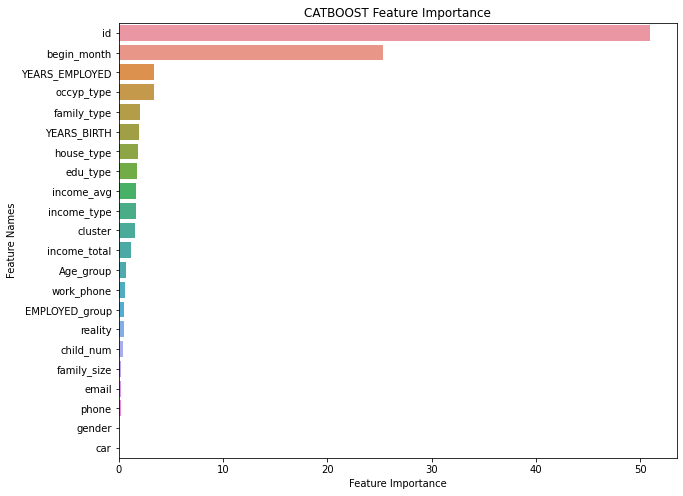

In [21]:
plot_feature_importance(model_cat.get_feature_importance(),X_test.columns,'CATBOOST')

In [22]:
sub = pd.read_csv('./data/sample_submission.csv')
sub.iloc[:, 1:] = cat_pred_test
sub


,index,0,1,2
0,26457,0.103069,0.172494,0.724437
1,26458,0.333736,0.236287,0.429977
2,26459,0.034331,0.070895,0.894774
3,26460,0.051593,0.085600,0.862807
4,26461,0.085521,0.243002,0.671478
...,...,...,...,...
9995,36452,0.072717,0.231791,0.695492
9996,36453,0.338143,0.188082,0.473776
9997,36454,0.050162,0.112284,0.837554
9998,36455,0.152907,0.311042,0.536051


In [23]:
sub.to_csv('submission0523_Final.csv', index=False)

## XGboost

In [24]:
seed = 42
#n_fold_list = list(range(7,16,1))
n_fold_list = [14]
n_class = 3

target = 'credit'
X = train.drop(target, axis=1)
y = train[target]
X_test = test
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2)

### XGBoost Optuna

In [25]:
# def objective(trial):
    
#     params = {
#         "objective": "multi:softprob",
#         "eval_metric":'mlogloss',
#         "booster": 'gbtree',
#         #'tree_method':'gpu_hist', 'predictor':'gpu_predictor', 'gpu_id': 0, # GPU 사용시
#         "tree_method": 'exact', 'gpu_id': -1,  # CPU 사용시
#         "verbosity": 0,
#         'num_class':3,
#         "max_depth": trial.suggest_int("max_depth", 4, 10),
#         "learning_rate": trial.suggest_uniform('learning_rate', 0.0001, 0.99),
#         'n_estimators': trial.suggest_int("n_estimators", 1000, 10000, step=100),
#         "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
#         "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.5, 1.0),
#         "colsample_bynode": trial.suggest_float("colsample_bynode", 0.5, 1.0),
#         "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-2, 1),
#         "reg_alpha": trial.suggest_loguniform("reg_alpha", 1e-2, 1),
#         'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),     
#         'min_child_weight': trial.suggest_int('min_child_weight', 2, 15),
#         "gamma": trial.suggest_float("gamma", 0.1, 1.0, log=True),
#         # 'num_parallel_tree': trial.suggest_int("num_parallel_tree", 1, 500) 추가하면 느려짐.
#     }


#     model = xgb.XGBClassifier(**params, random_state = 42, use_label_encoder = False)

#     bst = model.fit(X_train, y_train,eval_set=[(X_valid,y_valid)], early_stopping_rounds=50, verbose=False)
#     preds = bst.predict(X_valid)
#     pred_labels = np.rint(preds)
#     accuracy = sklearn.metrics.accuracy_score(y_valid, pred_labels)
#     return accuracy

In [26]:
# if __name__ == "__main__":
    
#     train_start = time.time()

#     study = optuna.create_study(direction="maximize")
#     study.optimize(objective, n_trials=50, show_progress_bar=True)

#     print("Number of finished trials: ", len(study.trials))
#     print("Best trial:")


#     trial = study.best_trial

#     print("  Accuracy: {}".format(trial.value))
#     print("  Best hyperparameters: ")
#     for key, value in trial.params.items():
#         print("    {}: {}".format(key, value))

   
#     clf = xgb.XGBClassifier(**study.best_params, random_state = 42, use_label_encoder = False)
#     clf.fit(X_train, y_train)

In [27]:
# [I 2022-07-04 00:13:35,304] Trial 49 finished with value: 0.7138804841149773 and parameters: {'max_depth': 10, 'learning_rate': 0.032166277590883016, 'n_estimators': 7100, 'colsample_bytree': 0.7372280471995342, 'colsample_bylevel': 0.7326807289097955, 'colsample_bynode': 0.8637420520455108, 'reg_lambda': 0.03034210062735316, 'reg_alpha': 0.25122480320909407, 'subsample': 0.7, 'min_child_weight': 9, 'gamma': 0.5094543733026454}. Best is trial 37 with value: 0.7176626323751891.
# Number of finished trials:  50
# Best trial:
#   Accuracy: 0.7176626323751891
#   Best hyperparameters: 
#     max_depth: 10
#     learning_rate: 0.042682828665117856
#     n_estimators: 7700
#     colsample_bytree: 0.6234559576064841
#     colsample_bylevel: 0.7494441351906806
#     colsample_bynode: 0.5813002270564782
#     reg_lambda: 0.055998465082564126
#     reg_alpha: 0.7569073620106024
#     subsample: 0.75
#     min_child_weight: 13
#     gamma: 0.5029496341044878

### XGBModeling

In [28]:
# *** 14 ***

# ----------------- Fold 0 -----------------

# [0]	validation_0-mlogloss:1.08348
# [100]	validation_0-mlogloss:0.75842
# [200]	validation_0-mlogloss:0.73031
# [300]	validation_0-mlogloss:0.71570
# [400]	validation_0-mlogloss:0.70666
# [500]	validation_0-mlogloss:0.70065
# [600]	validation_0-mlogloss:0.69799
# [700]	validation_0-mlogloss:0.69649
# [800]	validation_0-mlogloss:0.69610
# [890]	validation_0-mlogloss:0.69712
# CV Log Loss Score: 0.695633

# ----------------- Fold 1 -----------------

# [0]	validation_0-mlogloss:1.08364
# [100]	validation_0-mlogloss:0.75966
# [200]	validation_0-mlogloss:0.73069
# [300]	validation_0-mlogloss:0.71483
# [400]	validation_0-mlogloss:0.70576
# [500]	validation_0-mlogloss:0.70070
# [600]	validation_0-mlogloss:0.69814
# [700]	validation_0-mlogloss:0.69739
# [800]	validation_0-mlogloss:0.69794
# [803]	validation_0-mlogloss:0.69796
# CV Log Loss Score: 0.697227

# ----------------- Fold 2 -----------------

# [0]	validation_0-mlogloss:1.08366
# [100]	validation_0-mlogloss:0.75952
# [200]	validation_0-mlogloss:0.73257
# [300]	validation_0-mlogloss:0.71803
# [400]	validation_0-mlogloss:0.71072
# [500]	validation_0-mlogloss:0.70599
# [600]	validation_0-mlogloss:0.70430
# [700]	validation_0-mlogloss:0.70419
# [722]	validation_0-mlogloss:0.70387
# CV Log Loss Score: 0.703374

# ----------------- Fold 3 -----------------

# [0]	validation_0-mlogloss:1.08355
# [100]	validation_0-mlogloss:0.75532
# [200]	validation_0-mlogloss:0.72474
# [300]	validation_0-mlogloss:0.70930
# [400]	validation_0-mlogloss:0.70192
# [500]	validation_0-mlogloss:0.69746
# [600]	validation_0-mlogloss:0.69427
# [700]	validation_0-mlogloss:0.69270
# [800]	validation_0-mlogloss:0.69152
# [891]	validation_0-mlogloss:0.69137
# CV Log Loss Score: 0.691168

# ----------------- Fold 4 -----------------

# [0]	validation_0-mlogloss:1.08366
# [100]	validation_0-mlogloss:0.76464
# [200]	validation_0-mlogloss:0.73683
# [300]	validation_0-mlogloss:0.72120
# [400]	validation_0-mlogloss:0.71337
# [500]	validation_0-mlogloss:0.71031
# [600]	validation_0-mlogloss:0.70801
# [700]	validation_0-mlogloss:0.70754
# [767]	validation_0-mlogloss:0.70856
# CV Log Loss Score: 0.707417

# ----------------- Fold 5 -----------------

# [0]	validation_0-mlogloss:1.08388
# [100]	validation_0-mlogloss:0.77383
# [200]	validation_0-mlogloss:0.74768
# [300]	validation_0-mlogloss:0.73316
# [400]	validation_0-mlogloss:0.72505
# [500]	validation_0-mlogloss:0.72152
# [600]	validation_0-mlogloss:0.71943
# [700]	validation_0-mlogloss:0.71922
# [800]	validation_0-mlogloss:0.71959
# [824]	validation_0-mlogloss:0.71941
# CV Log Loss Score: 0.718274

# ----------------- Fold 6 -----------------

# [0]	validation_0-mlogloss:1.08390
# [100]	validation_0-mlogloss:0.78087
# [200]	validation_0-mlogloss:0.75228
# [300]	validation_0-mlogloss:0.73803
# [400]	validation_0-mlogloss:0.72970
# [500]	validation_0-mlogloss:0.72322
# [600]	validation_0-mlogloss:0.72069
# [700]	validation_0-mlogloss:0.71763
# [800]	validation_0-mlogloss:0.71731
# [862]	validation_0-mlogloss:0.71753
# CV Log Loss Score: 0.717055

# ----------------- Fold 7 -----------------

# [0]	validation_0-mlogloss:1.08337
# [100]	validation_0-mlogloss:0.78270
# [200]	validation_0-mlogloss:0.76037
# [300]	validation_0-mlogloss:0.74864
# [400]	validation_0-mlogloss:0.74212
# [500]	validation_0-mlogloss:0.73722
# [600]	validation_0-mlogloss:0.73492
# [700]	validation_0-mlogloss:0.73456
# [800]	validation_0-mlogloss:0.73535
# [836]	validation_0-mlogloss:0.73565
# CV Log Loss Score: 0.734443

# ----------------- Fold 8 -----------------

# [0]	validation_0-mlogloss:1.08180
# [100]	validation_0-mlogloss:0.75566
# [200]	validation_0-mlogloss:0.72392
# [300]	validation_0-mlogloss:0.70765
# [400]	validation_0-mlogloss:0.69768
# [500]	validation_0-mlogloss:0.69119
# [600]	validation_0-mlogloss:0.68747
# [700]	validation_0-mlogloss:0.68743
# [741]	validation_0-mlogloss:0.68680
# CV Log Loss Score: 0.686709

# ----------------- Fold 9 -----------------

# [0]	validation_0-mlogloss:1.08180
# [100]	validation_0-mlogloss:0.76997
# [200]	validation_0-mlogloss:0.74724
# [300]	validation_0-mlogloss:0.73708
# [400]	validation_0-mlogloss:0.73211
# [500]	validation_0-mlogloss:0.73015
# [600]	validation_0-mlogloss:0.73100
# [635]	validation_0-mlogloss:0.73183
# CV Log Loss Score: 0.729912

# ----------------- Fold 10 -----------------

# [0]	validation_0-mlogloss:1.08208
# [100]	validation_0-mlogloss:0.75888
# [200]	validation_0-mlogloss:0.72617
# [300]	validation_0-mlogloss:0.70832
# [400]	validation_0-mlogloss:0.69610
# [500]	validation_0-mlogloss:0.68854
# [600]	validation_0-mlogloss:0.68463
# [700]	validation_0-mlogloss:0.68153
# [800]	validation_0-mlogloss:0.67987
# [900]	validation_0-mlogloss:0.67889
# [1000]	validation_0-mlogloss:0.67894
# [1020]	validation_0-mlogloss:0.67851
# CV Log Loss Score: 0.678303

# ----------------- Fold 11 -----------------

# [0]	validation_0-mlogloss:1.08174
# [100]	validation_0-mlogloss:0.76290
# [200]	validation_0-mlogloss:0.73370
# [300]	validation_0-mlogloss:0.71877
# [400]	validation_0-mlogloss:0.70880
# [500]	validation_0-mlogloss:0.70219
# [600]	validation_0-mlogloss:0.69901
# [700]	validation_0-mlogloss:0.69759
# [800]	validation_0-mlogloss:0.69800
# [818]	validation_0-mlogloss:0.69826
# CV Log Loss Score: 0.697095

# ----------------- Fold 12 -----------------

# [0]	validation_0-mlogloss:1.08168
# [100]	validation_0-mlogloss:0.75588
# [200]	validation_0-mlogloss:0.72785
# [300]	validation_0-mlogloss:0.71233
# [400]	validation_0-mlogloss:0.70364
# [500]	validation_0-mlogloss:0.69872
# [600]	validation_0-mlogloss:0.69660
# [700]	validation_0-mlogloss:0.69676
# [750]	validation_0-mlogloss:0.69720
# CV Log Loss Score: 0.695721

# ----------------- Fold 13 -----------------

# [0]	validation_0-mlogloss:1.08199
# [100]	validation_0-mlogloss:0.76592
# [200]	validation_0-mlogloss:0.74013
# [300]	validation_0-mlogloss:0.72905
# [400]	validation_0-mlogloss:0.72245
# [500]	validation_0-mlogloss:0.71940
# [600]	validation_0-mlogloss:0.71990
# [611]	validation_0-mlogloss:0.71960
# CV Log Loss Score: 0.719019
# 	<*><*><*><*><*><*>Log Loss: 0.705097<*><*><*><*><*><*>

In [29]:
seed = 42
#n_fold_list = list(range(7,16,1))
n_fold_list = [14]
n_class = 3

target = 'credit'
X = train.drop(target, axis=1)
y = train[target]

In [30]:
xgb_params={
    'random_state' : 42,
    'max_depth': 10,
    'learning_rate': 0.042682828665117856,
    'n_estimators': 7700,
    'colsample_bytree': 0.6234559576064841,
    'colsample_bylevel': 0.7494441351906806,
    'colsample_bynode': 0.5813002270564782,
    'reg_lambda': 0.055998465082564126,
    'reg_alpha': 0.7569073620106024,
    'subsample': 0.75,
    'min_child_weight': 13,
    'gamma': 0.5029496341044878,
}

In [31]:
for n_fold in n_fold_list:
    print('***',n_fold,'***')

    skfold = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)
    folds=[]
    for train_idx, valid_idx in skfold.split(X, y):
            folds.append((train_idx, valid_idx))

    cat_pred = np.zeros((X.shape[0], n_class))
    cat_pred_test = np.zeros((X_test.shape[0], n_class))
    # cat_cols = ['id', 'gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'YEARS_EMPLOYED', 'EMPLOYED_group']
    cat_cols = ['id',  'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'YEARS_EMPLOYED']
    for fold in range(n_fold):
        print(f'\n----------------- Fold {fold} -----------------\n')
        train_idx, valid_idx = folds[fold]
        X_train, X_valid, y_train, y_valid = X.iloc[train_idx], X.iloc[valid_idx], y[train_idx], y[valid_idx]
        evals=[(X_valid,y_valid)]
        model_cat = xgb.XGBClassifier(**xgb_params)
        model_cat.fit(X_train,y_train,eval_set=evals, early_stopping_rounds=100, verbose=100)

        cat_pred[valid_idx] = model_cat.predict_proba(X_valid)
        cat_pred_test += model_cat.predict_proba(X_test) / n_fold
        print(f'CV Log Loss Score: {log_loss(y_valid, cat_pred[valid_idx]):.6f}')
        
    print(f'\t<*><*><*><*><*><*>Log Loss: {log_loss(y, cat_pred):.6f}<*><*><*><*><*><*>\n\n\n\n')

*** 14 ***

----------------- Fold 0 -----------------

[0]	validation_0-mlogloss:1.08348
[100]	validation_0-mlogloss:0.75842
[200]	validation_0-mlogloss:0.73031
[300]	validation_0-mlogloss:0.71570
[400]	validation_0-mlogloss:0.70666
[500]	validation_0-mlogloss:0.70065
[600]	validation_0-mlogloss:0.69799
[700]	validation_0-mlogloss:0.69649
[800]	validation_0-mlogloss:0.69610
[891]	validation_0-mlogloss:0.69704
CV Log Loss Score: 0.695633

----------------- Fold 1 -----------------

[0]	validation_0-mlogloss:1.08364
[100]	validation_0-mlogloss:0.75966
[200]	validation_0-mlogloss:0.73069
[300]	validation_0-mlogloss:0.71483
[400]	validation_0-mlogloss:0.70576
[500]	validation_0-mlogloss:0.70070
[600]	validation_0-mlogloss:0.69814
[700]	validation_0-mlogloss:0.69739
[800]	validation_0-mlogloss:0.69794
[803]	validation_0-mlogloss:0.69796
CV Log Loss Score: 0.697227

----------------- Fold 2 -----------------

[0]	validation_0-mlogloss:1.08366
[100]	validation_0-mlogloss:0.75952
[200]	valida

In [32]:
def plot_feature_importance(importance,names,model_type):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))

    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

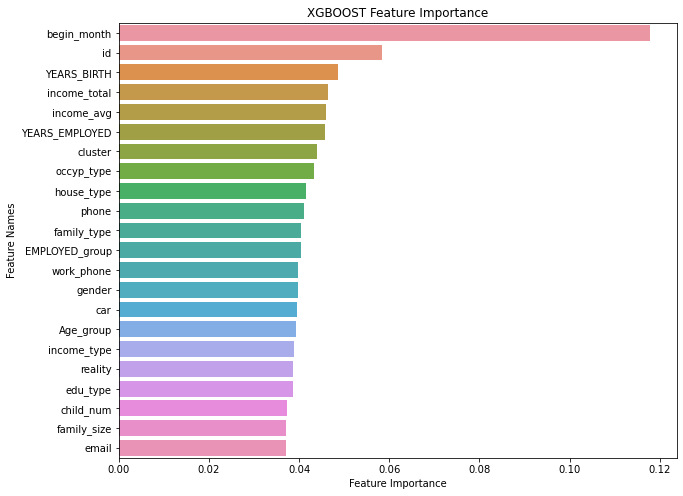

In [33]:
plot_feature_importance(model_cat.feature_importances_,X_test.columns,'XGBOOST')

## Randomforest

In [34]:
seed = 42
#n_fold_list = list(range(7,16,1))
n_fold_list = [14]
n_class = 3

target = 'credit'
X = train.drop(target, axis=1)
y = train[target]
X_test = test
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2)

### RandomForest Optuna

In [35]:
# def objective(trial):
    
#     params = {
#             'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
#             'max_depth': trial.suggest_int('max_depth', 1, 50),
#             #'min_samples_split': trial.suggest_int('min_samples_split', 1, 150),
#             'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 60),
#             'bootstrap' : trial.suggest_categorical('bootstrap',['True','False']),
#             'max_features' :trial.suggest_categorical('max_features', ['auto', 'sqrt','log2']),
#             'max_leaf_nodes' : trial.suggest_int('max_leaf_nodes', 1, 10000)
#         }

#     model = RandomForestClassifier(**params, random_state = 42)

#     bst = model.fit(X_train, y_train)
#     preds = bst.predict(X_valid)
#     pred_labels = np.rint(preds)
#     accuracy = sklearn.metrics.accuracy_score(y_valid, pred_labels)
#     return accuracy

In [36]:
# if __name__ == "__main__":
    
#     train_start = time.time()

#     study = optuna.create_study(direction="maximize")
#     study.optimize(objective, n_trials=50, show_progress_bar=True)

#     print("Number of finished trials: ", len(study.trials))
#     print("Best trial:")


#     trial = study.best_trial

#     print("  Accuracy: {}".format(trial.value))
#     print("  Best hyperparameters: ")
#     for key, value in trial.params.items():
#         print("    {}: {}".format(key, value))

   
#     clf = RandomForestClassifier(**study.best_params, random_state = 42)
#     clf.fit(X_train, y_train)

In [37]:
# Number of finished trials:  50
# Best trial:
#   Accuracy: 0.7256051437216339
#   Best hyperparameters: 
#     n_estimators: 812
#     max_depth: 29
#     min_samples_leaf: 2
#     bootstrap: False
#     max_features: log2
#     max_leaf_nodes: 9937

### RFModeling

In [38]:
seed = 42
#n_fold_list = list(range(7,16,1))
n_fold_list = [14]
n_class = 3

target = 'credit'
X = train.drop(target, axis=1)
y = train[target]

In [39]:
randomforest_params={
    'n_estimators': 812,
    'max_depth': 29,
    'min_samples_leaf': 2,
    'bootstrap': False,
    'max_features': 'log2',
    'max_leaf_nodes': 9937,
}

In [40]:
# *** 14 ***

# ----------------- Fold 0 -----------------

# CV Log Loss Score: 0.701529

# ----------------- Fold 1 -----------------

# CV Log Loss Score: 0.729972

# ----------------- Fold 2 -----------------

# CV Log Loss Score: 0.749954

# ----------------- Fold 3 -----------------

# CV Log Loss Score: 0.712906

# ----------------- Fold 4 -----------------

# CV Log Loss Score: 0.741175

# ----------------- Fold 5 -----------------

# CV Log Loss Score: 0.722170

# ----------------- Fold 6 -----------------

# CV Log Loss Score: 0.737593

# ----------------- Fold 7 -----------------

# CV Log Loss Score: 0.762987

# ----------------- Fold 8 -----------------

# CV Log Loss Score: 0.703773

# ----------------- Fold 9 -----------------

# CV Log Loss Score: 0.781967

# ----------------- Fold 10 -----------------

# CV Log Loss Score: 0.699059

# ----------------- Fold 11 -----------------

# CV Log Loss Score: 0.712890

# ----------------- Fold 12 -----------------

# CV Log Loss Score: 0.731528

# ----------------- Fold 13 -----------------

# CV Log Loss Score: 0.752411
# 	<*><*><*><*><*><*>Log Loss: 0.731423<*><*><*><*><*><*>

In [41]:
for n_fold in n_fold_list:
    print('***',n_fold,'***')

    skfold = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)
    folds=[]
    for train_idx, valid_idx in skfold.split(X, y):
            folds.append((train_idx, valid_idx))

    cat_pred = np.zeros((X.shape[0], n_class))
    cat_pred_test = np.zeros((X_test.shape[0], n_class))
    for fold in range(n_fold):
        print(f'\n----------------- Fold {fold} -----------------\n')
        train_idx, valid_idx = folds[fold]
        X_train, X_valid, y_train, y_valid = X.iloc[train_idx], X.iloc[valid_idx], y[train_idx], y[valid_idx]
        #evals=[(X_valid,y_valid)]
        model_cat = RandomForestClassifier(**randomforest_params)
        model_cat.fit(X_train,y_train)

        cat_pred[valid_idx] = model_cat.predict_proba(X_valid)
        cat_pred_test += model_cat.predict_proba(X_test) / n_fold
        print(f'CV Log Loss Score: {log_loss(y_valid, cat_pred[valid_idx]):.6f}')
        
    print(f'\t<*><*><*><*><*><*>Log Loss: {log_loss(y, cat_pred):.6f}<*><*><*><*><*><*>\n\n\n\n')

*** 14 ***

----------------- Fold 0 -----------------

CV Log Loss Score: 0.700377

----------------- Fold 1 -----------------

CV Log Loss Score: 0.728805

----------------- Fold 2 -----------------

CV Log Loss Score: 0.746528

----------------- Fold 3 -----------------

CV Log Loss Score: 0.709962

----------------- Fold 4 -----------------

CV Log Loss Score: 0.741161

----------------- Fold 5 -----------------

CV Log Loss Score: 0.720759

----------------- Fold 6 -----------------

CV Log Loss Score: 0.739420

----------------- Fold 7 -----------------

CV Log Loss Score: 0.763492

----------------- Fold 8 -----------------

CV Log Loss Score: 0.704299

----------------- Fold 9 -----------------

CV Log Loss Score: 0.782790

----------------- Fold 10 -----------------

CV Log Loss Score: 0.699840

----------------- Fold 11 -----------------

CV Log Loss Score: 0.713053

----------------- Fold 12 -----------------

CV Log Loss Score: 0.732826

----------------- Fold 13 ----------

In [42]:
def plot_feature_importance(importance,names,model_type):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))

    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

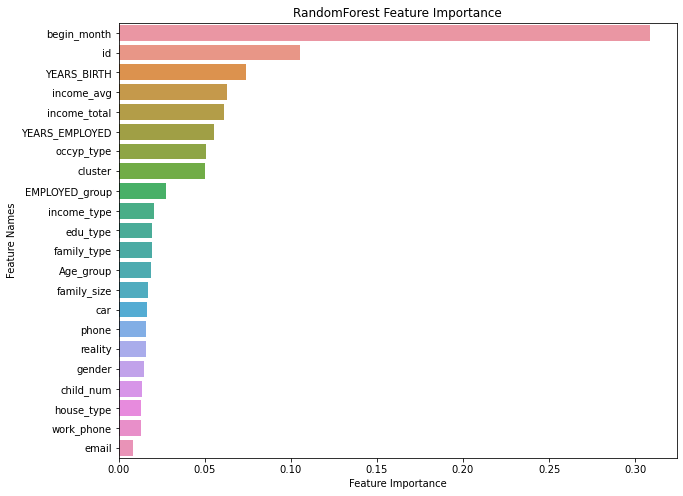

In [43]:
plot_feature_importance(model_cat.feature_importances_,X_test.columns,'RandomForest')